# Week 2 Network Cnonectivity

## Clustering Coefficient

###  Local Clustering Coefficient in NetworkX

In [2]:
import networkx as nx
import matplotlib as plt
%matplotlib inline 
plt.rcParams['figure.figsize'] = (20.0, 10.0)


In [3]:
G = nx.Graph()

In [4]:
G.add_edges_from([('A', 'K'), ('A', 'B'), ('A','C'), ('B','C'),('B','K'),('C','E'),('C','F'),('D','E'),('E','F'),('E','H'),('F','G'),('I','J')])

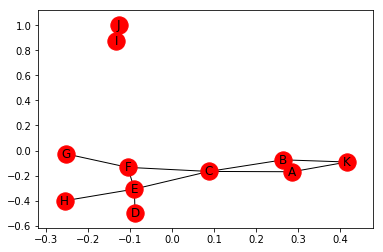

In [5]:
nx.draw_networkx(G)

In [6]:
nx.clustering(G, 'F')

0.3333333333333333

In [7]:
nx.clustering(G, 'A')

0.6666666666666666

In [8]:
nx.clustering(G, 'J')

0

### Global Clustering Coefficient

> Approach 1: Average Local Clustering Coefficient <br>
 Average Local Clustering Coefficient over all nodes in a network

In [9]:
nx.average_clustering(G)

0.28787878787878785

> Approach 2: Transitivity. <br>
Ratio of number of triangles and number of 'open triads'. <br>
Puts larger weight on high degree nodes.

In [10]:
nx.transitivity(G)

0.4090909090909091

## Distance Measure

In [11]:
G = nx.Graph()
G.add_edges_from([('A', 'K'), ('A', 'B'), ('B','C'),('B','K'),('C','E'),('C','F'),('D','E'),('E','F'),('E','H'), ('E','I'),('F','G'),('I','J')])


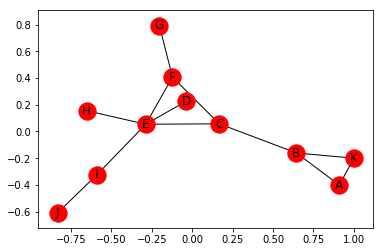

In [12]:
nx.draw_networkx(G)

In [13]:
nx.shortest_path(G, 'A', 'H')

['A', 'B', 'C', 'E', 'H']

In [14]:
nx.shortest_path_length(G, 'A', 'H')

4

### Breadth-First Search

In [15]:
T = nx.bfs_tree(G, 'A')
T.edges()

OutEdgeView([('A', 'K'), ('A', 'B'), ('B', 'C'), ('C', 'E'), ('C', 'F'), ('E', 'D'), ('E', 'H'), ('E', 'I'), ('F', 'G'), ('I', 'J')])

In [16]:
nx.shortest_path_length(G, 'A')

{'A': 0,
 'K': 1,
 'B': 1,
 'C': 2,
 'E': 3,
 'F': 3,
 'D': 4,
 'H': 4,
 'I': 4,
 'G': 4,
 'J': 5}

In [17]:
#Average distance, between every pair of nodes.
nx.average_shortest_path_length(G)

2.5272727272727273

In [18]:
#Diameter, maximum disctance between any pairs of nodes
nx.diameter(G)

5

In [19]:
#Ecentricity, the Ecentricity of a node n is the largest distance between n and all other nodes
nx.eccentricity(G)

{'A': 5,
 'K': 5,
 'B': 4,
 'C': 3,
 'E': 3,
 'F': 3,
 'D': 4,
 'H': 4,
 'I': 4,
 'G': 4,
 'J': 5}

In [20]:
#Radius, the radius of a graph is the minimum eccentricity
nx.radius(G)

3

In [21]:
#Periphery, the periphery of a graph is the set of nodes that have eccentricity equal to the diameter.
nx.periphery(G)

['A', 'K', 'J']

In [22]:
#Center, the center of a graph is the set of nodes that have eccentricity equal to the radius
nx.center(G)

['C', 'E', 'F']

### Karate Club Network

In [23]:
G = nx.karate_club_graph()
G = nx.convert_node_labels_to_integers(G, first_label=1)

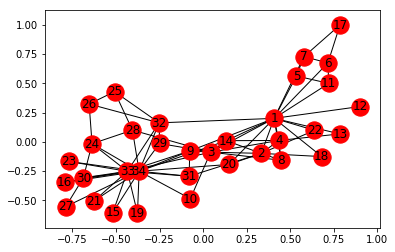

In [24]:
nx.draw_networkx(G)

In [25]:
#Average distance
nx.average_shortest_path_length(G)

2.408199643493761

In [26]:
#Radius, the radius of a graph is the minimum eccentricity
nx.radius(G)

3

In [27]:
#Diameter, maximum disctance between any pairs of nodes
nx.diameter(G)

5

In [28]:
#Center, the center of a graph is the set of nodes that have eccentricity equal to the radius
nx.center(G)
#Node 34 looks pretty 'central. However, it has distance 4 to node 17.

[1, 2, 3, 4, 9, 14, 20, 32]

In [29]:
#Periphery, the periphery of a graph is the set of nodes that have eccentricity equal to the diameter.
nx.periphery(G)

[15, 16, 17, 19, 21, 23, 24, 27, 30]

## Connected Components

- Undirected Connected Graphs. <br>
  i) Every node in the subsets has a path to every othe node. <br>
  ii) No other node is has a pth to any node in the subsets.

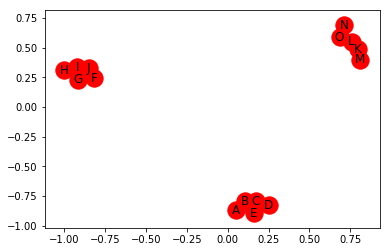

In [30]:
G = nx.Graph()
G.add_edges_from([('A','B'), ('A','C'), ('A','E'), ('B','C'),('B','D'), ('B','E'), ('C','D'),('C','E'), ('D','E')])
G.add_edges_from([('F','G'),('F','I'),('F','J'),('G','H'),('G','I'),('G','J'),('H','I'),('H','J'),('I','J')])
G.add_edges_from([('K','L'),('K','M'),('K','O'),('L','M'),('L','N'),('L','O'),('N','O')])
nx.draw_networkx(G)

In [31]:
nx.is_connected(G)

False

In [32]:
nx.number_connected_components(G)

3

In [33]:
sorted(nx.connected_components(G))

[{'A', 'B', 'C', 'D', 'E'},
 {'F', 'G', 'H', 'I', 'J'},
 {'K', 'L', 'M', 'N', 'O'}]

In [34]:
nx.node_connected_component(G, 'M')

{'K', 'L', 'M', 'N', 'O'}

- Directed Connected Graphs (Strongly) <br>
  i) For every pair nodes u and v, there is a directed path from u to v a nd a directed path from v to u <br>
  ii} No other node has a directed path to and from every node in the subset.

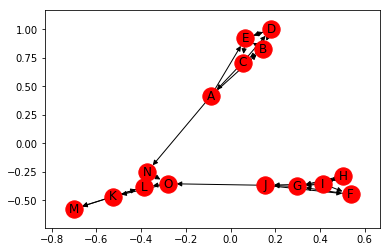

In [35]:
G = nx.DiGraph()
G.add_edges_from([('A','B'), ('C', 'A'), ('A','E'), ('B','C'),('D','B'), ('B','E'), ('C','D'),('E','C'), ('D','E'), ('E','D')])
G.add_edges_from([('F','G'),('I','F'),('J','F'),('H','G'),('I','G'),('G','J'),('I','H'),('I','J')])
G.add_edges_from([('K','L'),('K','M'),('O','K'),('L','M'),('N','L'),('O','L'),('N','O')])
G.add_edges_from([('H','I'),('A','N'),('J','O')])
nx.draw_networkx(G)

![title](stronglyconnectedcomponent.png)

In [36]:
nx.is_strongly_connected(G) #for undirected graph, use nx.is_connected(G)
#There is no directed path from A to H

False

In [37]:
nx.is_weakly_connected(G) #A directed graph is weekly connected, if replacing all directed edges with undirected edges (virtually) produces a connected undirected graph.

True

In [38]:
sorted(nx.strongly_connected_components(G))

[{'M'},
 {'L'},
 {'K'},
 {'O'},
 {'N'},
 {'A', 'B', 'C', 'D', 'E'},
 {'F', 'G', 'J'},
 {'H', 'I'}]

In [39]:
sorted(nx.weakly_connected_components(G))

[{'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O'}]

## Network Robustness

In [77]:
#Graphs with large node and edge connectivity are more robust to the losdd of nodes and edges.

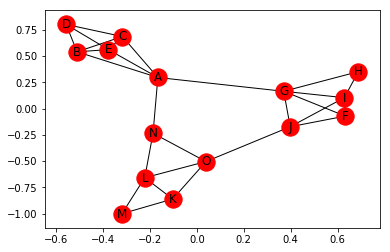

In [63]:
G_un = nx.Graph()
G_un.add_edges_from([('A','B'), ('A','C'), ('A','E'), ('B','C'),('B','D'), ('B','E'), ('C','D'),('C','E'), ('D','E')])
G_un.add_edges_from([('F','G'),('F','I'),('F','J'),('G','H'),('G','I'),('G','J'),('H','I'),('I','J')])
G_un.add_edges_from([('K','L'),('K','M'),('K','O'),('L','M'),('L','N'),('L','O'),('N','O')])
G_un.add_edges_from([('G','A'),('A','N'),('O','J')])
nx.draw_networkx(G_un)

In [64]:
# What's the smallest number of *nodes* that can be removed from this graph in order to disconnect it?
nx.node_connectivity(G_un)

1

In [65]:
# Which node?
nx.minimum_node_cut(G_un)

{'A'}

In [66]:
# What's the smallest number of *edges* that can be removed from this graph in order to disconnect it?
nx.edge_connectivity(G_un)

2

In [67]:
# Which edges?
nx.minimum_edge_cut(G_un)
#{('G','A'), ('O','J')} #other option

{('G', 'A'), ('N', 'A')}

### Simple Paths

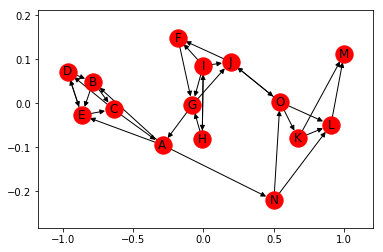

In [68]:
G = nx.DiGraph()
G.add_edges_from([('A','B'), ('C', 'A'), ('A','E'), ('B','C'),('D','B'), ('B','E'), ('C','D'),('E','C'), ('D','E'), ('E','D')])
G.add_edges_from([('F','G'),('I','F'),('J','F'),('H','G'),('I','G'),('G','J'),('I','H'),('I','J')])
G.add_edges_from([('K','L'),('K','M'),('O','K'),('L','M'),('N','L'),('O','L'),('N','O')])
G.add_edges_from([('H','I'),('A','N'),('J','O')])
G.add_edges_from([('G','A'),('A','N'),('O','J')])
nx.draw_networkx(G)

In [69]:
sorted(nx.all_simple_paths(G, 'G', 'L'))

[['G', 'A', 'N', 'L'],
 ['G', 'A', 'N', 'O', 'K', 'L'],
 ['G', 'A', 'N', 'O', 'L'],
 ['G', 'J', 'O', 'K', 'L'],
 ['G', 'J', 'O', 'L']]

In [70]:
# If we wanted to block the message from G to L by removing nodes from the network,
#how many *nodes* would we need to remove?
nx.node_connectivity(G, 'G', 'L')

2

In [71]:
# Which nodes?
nx.minimum_node_cut(G, 'G', 'L')

{'N', 'O'}

In [73]:
# If we wanted to block the message from G to L by removing nodes from the network,
#how many *edges* would we need to remove?
nx.edge_connectivity(G, 'G', 'L')

2

In [74]:
# Which edges?
nx.minimum_edge_cut(G, 'G', 'L')

{('A', 'N'), ('J', 'O')}

In [76]:
G = nx.DiGraph()
G.add_edges_from([('A', 'B'), ('C', 'A'), ('A', 'E'), ('G', 'A'), ('A', 'N'), ('B', 'C'), ('D', 'B'), ('B', 'E'), ('C', 'D'), ('E', 'C'), ('D', 'E'), ('E', 'D'), ('F', 'G'), ('I', 'F'), ('J', 'F'), ('H', 'G'), ('I', 'G'), ('G', 'J'), ('I', 'H'), ('H', 'I'), ('I', 'J'), ('J', 'O'), ('O', 'J'), ('K', 'M'), ('K', 'L'), ('O', 'K'), ('O', 'L'), ('N', 'L'), ('L', 'M'), ('N', 'O')])
nx.minimum_edge_cut(G, 'H', 'O')

{('J', 'O'), ('N', 'O')}